In [10]:
# Import libraries
import sys
import tweepy
import re
import matplotlib.pyplot as plt
import pandas as pd
import unidecode
from nltk.stem import SnowballStemmer
from nltk.tokenize import RegexpTokenizer
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
from langdetect import detect
import numpy as np

# NLP stemmer and tokenizer definition
stemmer = SnowballStemmer('spanish')
tokenizer = RegexpTokenizer(r'\w+')


In [11]:
# Load [Name, Coordinates, Radius] of each Autonomous Community]
Andalusia = ["Andalusia", "37.3399964,-4.5811614,250km"]
Madrid = ["Madrid", "40.5248319,-3.7715628,60km"]
Catalonia = ["Catalonia", "41.8523094,1.5745043,150km"]
Canary_Islands = ["Canary_Islands", "28.5306525,-15.7464439,400km"]
Basque_Country = ["Basque_Country", "42.9911816,-2.5543023,100km"]

CAS = [Andalusia, Madrid, Catalonia, Basque_Country, Canary_Islands]
CAS_name = [CA[0].replace("_", " ") for CA in CAS]

In [12]:
df_tweets = pd.read_csv("tweet_dataset.csv")

In [13]:
df_tweets

,id,tweet,location
0,3187391489,RT @Iyocnestospelos: Son las 9 de la mañana y ...,Andalusia
1,3187391489,RT @mariaaaraamos: Soy la única que le tiene m...,Andalusia
2,3187391489,RT @realhorseguy: I can’t stop watching this s...,Andalusia
3,3187391489,RT @juditvazzquez: Oye no dibujo bien pero qui...,Andalusia
4,3187391489,Punto y aparte,Andalusia
5,3187391489,RT @KristyVicious: Dj no he preparado nada htt...,Andalusia
6,3187391489,"RT @akagoodgyal: Disculpa, ¿eres el Imperio Es...",Andalusia
7,3187391489,No es por na pero me parece un poco de falta d...,Andalusia
8,3187391489,RT @LittleUmbreon: Escuchame da media vuelta y...,Andalusia
9,3187391489,RT @ylenavarro1: Adivinen quien no ha visto Al...,Andalusia


[('mas', 318), ('si', 293), ('q', 181), ('ser', 121), ('ver', 106), ('va', 95), ('dia', 94), ('anos', 93), ('hacer', 92), ('solo', 90)]
[('mas', 388), ('si', 203), ('ser', 131), ('-', 115), ('q', 97), ('anos', 90), ('solo', 85), ('gente', 85), ('va', 83), ('dia', 82)]
[('mas', 107), ('que', 102), ('si', 90), ('ver', 48), ('del', 43), ('q', 42), ('ser', 39), ('solo', 37), ('anos', 35), ('-', 34)]
[('mas', 368), ('si', 241), ('gente', 107), ('-', 98), ('hace', 96), ('ser', 92), ('ver', 89), ('hacer', 80), ('q', 77), ('va', 77)]
[('mas', 257), ('si', 165), ('-', 121), ('ser', 95), ('q', 88), ('anos', 72), ('solo', 63), ('tenerife', 63), ('gente', 62), ('dia', 58)]


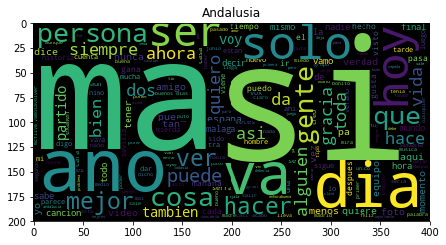

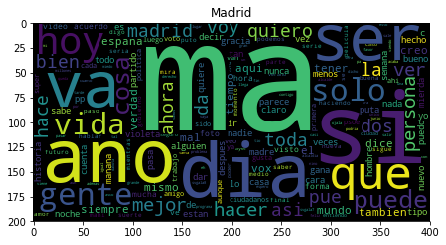

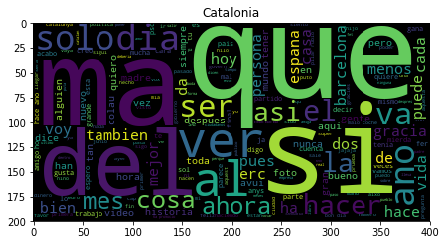

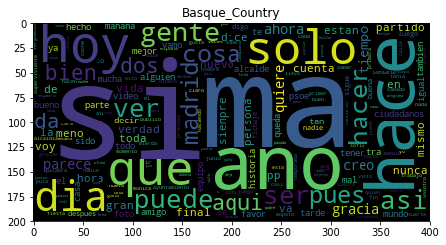

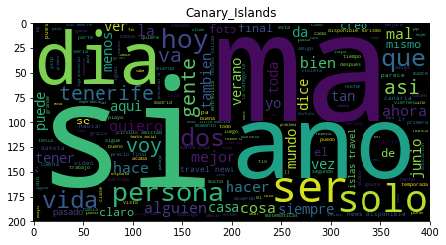

In [14]:
# We will use the not stemming tweets for the bag of words since we will be able to interpret the results
for CA in CAS:
    new_sentence = ""
    tweet_group = ""
    for index, row in df_tweets[df_tweets["location"] == CA[0]].iterrows():
        sentence = row[1].lower()
        sentence = unidecode.unidecode(sentence)
        words = sentence.split()
        try:
            if detect(row[1]) == "es":
                words = [w for w in words if not w in stopwords.words("spanish")] # Remove stopwords
            elif detect(row[1]) == "ca":
                words = [w for w in words if not w in stopwords.words("catalan.txt")]
            elif detect(row[1]) == "eu":
                words = [w for w in words if not w in stopwords.words("basque.txt")]
            else:
                words = [""]
            words = [w for w in words if (not "@" in w) if ("rt" != w.lower()) if (not "http" in w)]
            new_sentence = new_sentence + " ".join(words)
        except:
            "Do nothing"
    tweet_group_wc = WordCloud().generate(new_sentence)
    count_words = Counter(new_sentence.split(" ")).most_common(10)
    plt.figure()
    plt.title(CA[0])
    plt.imshow(tweet_group_wc)
    plt.tight_layout(pad = 0)
    print(count_words)
plt.show()

In [ ]:
# We see that most of the words are similar for each CA
# Most importantly, for Catalonia the word Barcelona appears frequently, same for Madrid with word Madrid
# Therefore, we want to mention here the second research question, and say that naming cities can influence
# the belonging of a tweet to that Autonomous Community's city

In [18]:
df_processed = pd.read_csv("tweet_dataset_processed.csv")

In [19]:
# Shuffle all unique ids
df_processed = df_processed.dropna()
ids = list(df_processed["id"].unique())

In [22]:
# Create dataframe with all unique ids and 0 in each of the CAS
df_CA_mentioned = pd.DataFrame(0, index=ids, columns=CAS_name)

In [23]:
# Read tweets not processed
df_tweets = pd.read_csv("tweet_dataset.csv")

# Read cities dataset
df_cities = pd.read_csv('cities.csv', encoding='utf-8')

In [24]:
# Count mentiones of cities for each user in every tweet
ids_CA_mention_count = []
for id_n in ids:
    CA_mention_count = [0,0,0,0,0]
    for index, row in df_tweets[df_tweets["id"] == id_n].iterrows():
        if any(i in row["tweet"].split() for i in list(df_cities[df_cities["admin"] == CAS_name[0]]["city"])):
            CA_mention_count[0] += 1
        if any(i in row["tweet"].split() for i in list(df_cities[df_cities["admin"] == CAS_name[1]]["city"])):
            CA_mention_count[1] += 1
        if any(i in row["tweet"].split() for i in list(df_cities[df_cities["admin"] == CAS_name[2]]["city"])):
            CA_mention_count[2] += 1
        if any(i in row["tweet"].split() for i in list(df_cities[df_cities["admin"] == CAS_name[3]]["city"])):
            CA_mention_count[3] += 1
        if any(i in row["tweet"].split() for i in list(df_cities[df_cities["admin"] == CAS_name[4]]["city"])):
            CA_mention_count[4] += 1
            
    ids_CA_mention_count.append([id_n, CA_mention_count, row["location"]])
    

In [25]:
# Save dataframe as csv
# Transform to dataframe
df_ids_CA_mention_count = pd.DataFrame(ids_CA_mention_count, columns = ["id", "CA_mention_count", "location"])

In [28]:
for CA in CAS:
    count = [0,0,0,0,0]
    for index, row in df_ids_CA_mention_count[df_ids_CA_mention_count["location"] == CA[0]].iterrows():
        count = np.add(count, row["CA_mention_count"])
    print("\nFor {}:".format(CA[0]))
    for CA_print, count_print in zip(CAS, count):
        print("    {} counts {}".format(CA_print[0],count_print))


For Andalusia:
    Andalusia counts 89
    Madrid counts 41
    Catalonia counts 13
    Basque_Country counts 1
    Canary_Islands counts 0

For Madrid:
    Andalusia counts 12
    Madrid counts 142
    Catalonia counts 17
    Basque_Country counts 1
    Canary_Islands counts 0

For Catalonia:
    Andalusia counts 16
    Madrid counts 47
    Catalonia counts 133
    Basque_Country counts 2
    Canary_Islands counts 0

For Basque_Country:
    Andalusia counts 18
    Madrid counts 87
    Catalonia counts 15
    Basque_Country counts 44
    Canary_Islands counts 0

For Canary_Islands:
    Andalusia counts 1
    Madrid counts 52
    Catalonia counts 17
    Basque_Country counts 4
    Canary_Islands counts 0
